Train size: (242, 13) Test size: (61, 13)

Logistic Regression Accuracy: 0.8689
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



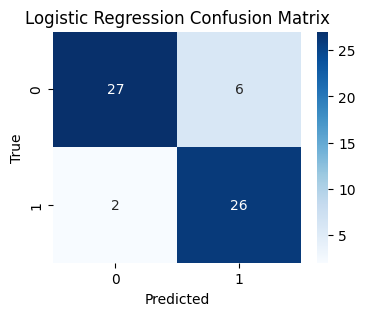


Decision Tree Accuracy: 0.7213
              precision    recall  f1-score   support

           0       0.81      0.64      0.71        33
           1       0.66      0.82      0.73        28

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.74      0.72      0.72        61



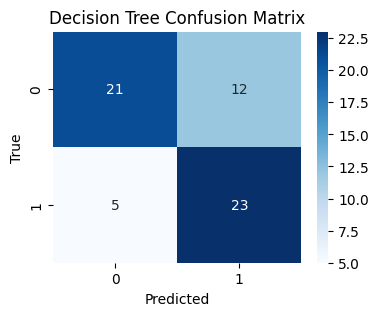


Random Forest Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



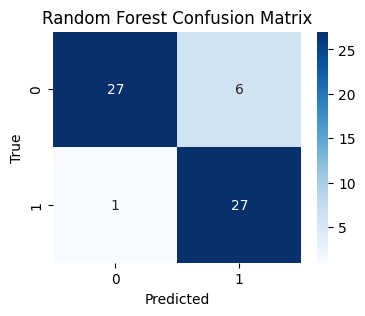

Best model is: Random Forest
✅ Saved full pipeline at: C:\Users\noorm\Documents\Heart_Disease_Project\models\final_pipeline.pkl


In [4]:
# %% [markdown]
# 04_supervised_learning.ipynb
# This notebook trains supervised learning models for heart disease prediction.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from pathlib import Path
from sklearn.pipeline import Pipeline

# %%
# Project paths
ROOT = Path("..").resolve()
DATA_DIR = ROOT / "data"
MODELS_DIR = ROOT / "models"
RESULTS_DIR = ROOT / "results"

# Load cleaned dataset
df = pd.read_csv(DATA_DIR / "heart_disease_cleaned.csv")

# Split features and target
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# %%
# Load fitted preprocessor (from Notebook 1)
preprocessor = joblib.load(MODELS_DIR / "preprocessor.pkl")

# %%
# Try different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    # Full pipeline: preprocessing + model
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Evaluate
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig(RESULTS_DIR / f"cm_{name.replace(' ', '_').lower()}.png")
    plt.show()

# %%
# Pick best model (highest accuracy)
best_model_name = max(results, key=results.get)
print("Best model is:", best_model_name)

final_model = models[best_model_name]

# Train again on full training set
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", final_model)
])

full_pipeline.fit(X_train, y_train)

# Save the full pipeline
joblib.dump(full_pipeline, MODELS_DIR / "final_pipeline.pkl")
print("✅ Saved full pipeline at:", MODELS_DIR / "final_pipeline.pkl")
